# MODEL 3 1-3-2
### Contains only fixed-before-conditional trials without intervening BLs
### Combines A & C trials into single regressor
### Accounts for last three noisy volumes in Lvl 1 analysis (FSL ROI -- ExtractROI)

## Compares activation for regions of interest using binarized masks:
### Hippocampus (FS labels: hippocampus [17, 53])
### Dorsal caudate (hand-drawn by Mandy)
### Putamen (FS labels: putamen [12, 51])

In [33]:
import os
from glob import glob

sids = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006', 
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012', 
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',  
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']

proj_dir = '/home/data/madlab/data/mri/wmaze'
 
mask_filenames = []
cope_files = []

for SID in sids:
    mask_filenames_glob = glob(proj_dir + '/roi_analysis/MRthesis/fb4c_2/mask/anat_masks/_subject_id_' 
                               + SID + '/_anatmask_xfm*/*')
    mask_filenames.append(mask_filenames_glob)

    subjcopes_glob = glob(proj_dir + '/scndlvl/wmaze_MRthesis/fixed_before_conditional/model3_1-3-2/' 
                          + SID + '/fixedfx/cope_*')
    cope_files.append(subjcopes_glob)
    if len(cope_files[-1]) == 0:
        print(SID)

## Cell to double-check the array indexing

### Use binarized mask to obtain activation in left & right hemisphere for each region of interest

In [34]:
import nibabel as nb
import pandas as pd
import numpy as np


#Dictionary containing multiple arrays referenced by keywords
all_data = {'subjid':[],
            'lhhp_all_before_B_corr':[], 'rhhp_all_before_B_corr':[], 
            'lhhp_all_before_B_incorr':[], 'rhhp_all_before_B_incorr':[],
            
            'lhcaudate_all_before_B_corr':[], 'rhcaudate_all_before_B_corr':[], 
            'lhcaudate_all_before_B_incorr':[], 'rhcaudate_all_before_B_incorr':[],
            
            'lhputamen_all_before_B_corr':[], 'rhputamen_all_before_B_corr':[], 
            'lhputamen_all_before_B_incorr':[], 'rhputamen_all_before_B_incorr':[]}


# For each interation in the length of subject ids
for i in range(len(sids)):
    #Append the subject id
    all_data['subjid'].append(sids[i])
    #Load the left and right hippocampus mask files using Nibabel 
    lh_hp_img = nb.load(mask_filenames[i][0])
    rh_hp_img = nb.load(mask_filenames[i][3])
    lh_caudate_img = nb.load(mask_filenames[i][1])
    rh_caudate_img = nb.load(mask_filenames[i][2])
    lh_putamen_img = nb.load(mask_filenames[i][4])
    rh_putamen_img = nb.load(mask_filenames[i][5])

    
    #Load copes for individual trial types
    all_before_B_corr_img = nb.load(cope_files[i][0])
    all_before_B_incorr_img = nb.load(cope_files[i][1])

    
    
    ########################
    ### Left Hippocampus ###
    ########################
    
    # all_before_B_corr
    lh_hp_all_before_B_corr_data = all_before_B_corr_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lhhp_all_before_B_corr'].append(np.mean(lh_hp_all_before_B_corr_data))
    
    # all_before_B_incorr
    lh_hp_all_before_B_incorr_data = all_before_B_incorr_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lhhp_all_before_B_incorr'].append(np.mean(lh_hp_all_before_B_incorr_data))

    
    #########################
    ### Right Hippocampus ###
    #########################
    
    # all_before_B_corr
    rh_hp_all_before_B_corr_data = all_before_B_corr_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rhhp_all_before_B_corr'].append(np.mean(rh_hp_all_before_B_corr_data))

    # all_before_B_incorr
    rh_hp_all_before_B_incorr_data = all_before_B_incorr_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rhhp_all_before_B_incorr'].append(np.mean(rh_hp_all_before_B_incorr_data))

    
    ####################
    ### Left Caudate ###
    ####################
    
    # all_before_B_corr
    lh_caudate_all_before_B_corr_data = all_before_B_corr_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lhcaudate_all_before_B_corr'].append(np.mean(lh_caudate_all_before_B_corr_data))
    
    # all_before_B_incorr
    lh_caudate_all_before_B_incorr_data = all_before_B_incorr_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lhcaudate_all_before_B_incorr'].append(np.mean(lh_caudate_all_before_B_incorr_data))
    
    
    #####################
    ### Right Caudate ###
    ##################### 
    
    # all_before_B_corr
    rh_caudate_all_before_B_corr_data = all_before_B_corr_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rhcaudate_all_before_B_corr'].append(np.mean(rh_caudate_all_before_B_corr_data))

    # all_before_B_incorr
    rh_caudate_all_before_B_incorr_data = all_before_B_incorr_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rhcaudate_all_before_B_incorr'].append(np.mean(rh_caudate_all_before_B_incorr_data))
    
    ####################
    ### Left Putamen ###
    ####################
    
    # all_before_B_corr
    lh_putamen_all_before_B_corr_data = all_before_B_corr_img.get_data()[lh_putamen_img.get_data() > 0.]
    all_data['lhputamen_all_before_B_corr'].append(np.mean(lh_putamen_all_before_B_corr_data))
    
    # all_before_B_incorr
    lh_putamen_all_before_B_incorr_data = all_before_B_incorr_img.get_data()[lh_putamen_img.get_data() > 0.]
    all_data['lhputamen_all_before_B_incorr'].append(np.mean(lh_putamen_all_before_B_incorr_data))
    
    
    #####################
    ### Right Putamen ###
    #####################
    
    # all_before_B_corr
    rh_putamen_all_before_B_corr_data = all_before_B_corr_img.get_data()[rh_putamen_img.get_data() > 0.]
    all_data['rhputamen_all_before_B_corr'].append(np.mean(rh_putamen_all_before_B_corr_data))

    # all_before_B_incorr
    rh_putamen_all_before_B_incorr_data = all_before_B_incorr_img.get_data()[rh_putamen_img.get_data() > 0.]
    all_data['rhputamen_all_before_B_incorr'].append(np.mean(rh_putamen_all_before_B_incorr_data))

    
all_data_df = pd.DataFrame(all_data)

### Combine the two hemispheres to create one regional average for both correct and incorrect

In [35]:
#Hippocampus average for each trial type
all_data_df['hp_all_before_B_corr'] = (all_data_df['lhhp_all_before_B_corr'] + 
                                       all_data_df['rhhp_all_before_B_corr'])/2.
all_data_df['hp_all_before_B_incorr'] = (all_data_df['lhhp_all_before_B_incorr'] + 
                                         all_data_df['rhhp_all_before_B_incorr'])/2.


#Caudate average for each trial type
all_data_df['caudate_all_before_B_corr'] = (all_data_df['lhcaudate_all_before_B_corr'] + 
                                            all_data_df['rhcaudate_all_before_B_corr'])/2.
all_data_df['caudate_all_before_B_incorr'] = (all_data_df['lhcaudate_all_before_B_incorr'] + 
                                              all_data_df['rhcaudate_all_before_B_incorr'])/2.


#Putamen average for each trial type
all_data_df['putamen_all_before_B_corr'] = (all_data_df['lhputamen_all_before_B_corr'] + 
                                            all_data_df['rhputamen_all_before_B_corr'])/2.
all_data_df['putamen_all_before_B_incorr'] = (all_data_df['lhputamen_all_before_B_incorr'] + 
                                              all_data_df['rhputamen_all_before_B_incorr'])/2.

In [36]:
#Provides performance for Conditional trials

%matplotlib inline
from os.path import join
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
from glob import glob
from pylab import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('muted')

subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006', 'WMAZE_007',
        'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012', 'WMAZE_017', 'WMAZE_018',
        'WMAZE_019', 'WMAZE_020', 'WMAZE_021', 'WMAZE_022', 'WMAZE_023', 'WMAZE_024',
        'WMAZE_026', 'WMAZE_027']

all_prop_B_incorr = []

for sub in subs:
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    dir_file = glob(join(sub_dir, '{0}_wmazebl_2015*.txt'.format(sub)))   
    dir_file.sort()    
    
    data_run1 = pd.read_table(dir_file[0])
    data_run1 = data_run1[:-3]
    data_run2 = pd.read_table(dir_file[1])
    data_run2 = data_run2[:-3]
    data_run3 = pd.read_table(dir_file[2])
    data_run3 = data_run3[:-3]
    data_run4 = pd.read_table(dir_file[3])
    data_run4 = data_run4[:-3]
    data_run5 = pd.read_table(dir_file[4])
    data_run5 = data_run5[:-3]
    data_run6 = pd.read_table(dir_file[5])
    data_run6 = data_run6[:-3]
    
    all_runs = [data_run1, data_run2, data_run3, data_run4, data_run5, data_run6]    
    data_set = pd.concat(all_runs)
    
    trialtype = data_set['TrialType'].values
    correct = data_set['Correct'].values 
    
    all_B_corr = np.where((trialtype == 'B') & (correct == 1))[0]
    all_B_incorr = np.where((trialtype == 'B') & (correct == 0))[0]
    
    prop_B_incorr = len(all_B_incorr)/float(len(all_B_corr) + len(all_B_incorr))
    all_prop_B_incorr.append(prop_B_incorr)
    #print prop_B_incorr
    


## Hippocampus Stats

HIPPOCAMPUS
pearsons r (-0.36733716513943682, 0.11109498203146306)


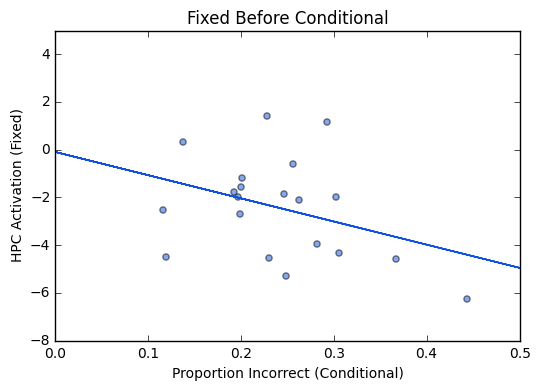

In [38]:
x = all_prop_B_incorr
y = all_data_df['hp_all_before_B_incorr']

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg = 1)
ax.plot(y, fit[0] * y + fit[1], color = '#0d53e0')
ax.scatter(x, y, c = '#0d53e0', edgecolors = 'black', alpha = 0.5)
ax.set_ylabel('HPC Activation (Fixed)')
ax.set_xlabel('Proportion Incorrect (Conditional)')
ax.set_title('Fixed Before Conditional')

ax.set_xlim(0, 0.5)
ax.set_ylim(-8, 5)

print "HIPPOCAMPUS"
print "pearsons r", pearsonr(x,y)

## Caudate Stats

CAUDATE
pearsons r (-0.30599662072552064, 0.18949197228691286)


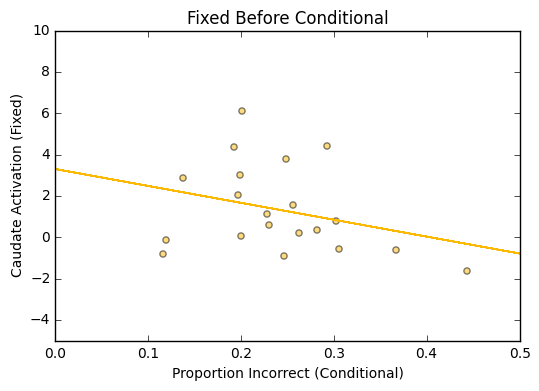

In [39]:
x = all_prop_B_incorr
y = all_data_df['caudate_all_before_B_incorr']

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg = 1)
ax.plot(y, fit[0] * y + fit[1], color = '#fcb902')
ax.scatter(x, y, c = '#fcb902', edgecolors = 'black', alpha = 0.5)
ax.set_ylabel('Caudate Activation (Fixed)')
ax.set_xlabel('Proportion Incorrect (Conditional)')
ax.set_title('Fixed Before Conditional')

ax.set_xlim(0, 0.5)
ax.set_ylim(-5, 10)

print "CAUDATE"
print "pearsons r", pearsonr(x,y)

## Putamen Stats

PUTAMEN
pearsons r (-0.11158053691995562, 0.63954149336353727)


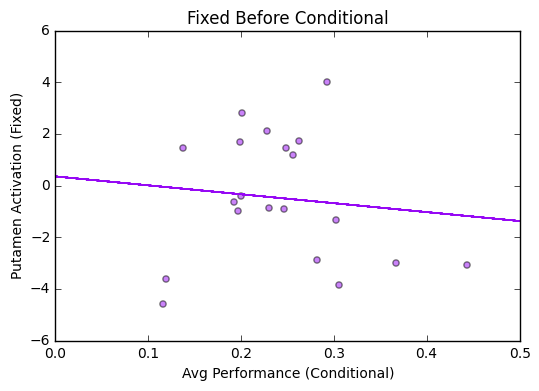

In [23]:
x = all_prop_B_incorr
y = all_data_df['putamen_all_before_B_incorr']

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg = 1)
ax.plot(y, fit[0] * y + fit[1], color = '#9609f4')
ax.scatter(x, y, c = '#9609f4', edgecolors = 'black', alpha = 0.5)
ax.set_ylabel('Putamen Activation (Fixed)')
ax.set_xlabel('Proportion Incorrect (Conditional)')
ax.set_title('Fixed Before Conditional')

ax.set_xlim(0, 0.5)
ax.set_ylim(-6, 6)

print "PUTAMEN"
print "pearsons r", pearsonr(x,y)